# Modelling

In [2]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#import statsmodels.api as sm
#from statsmodels.formula.api import ols

In [12]:
# load our clean df created from Cleaning-and-EDA
df_clean = pd.read_csv('Data/clean_df.csv')
seniors = df_clean[df_clean['senior']==1]

In [17]:
df_clean['senior'].value_counts()

0    820
1    244
Name: senior, dtype: int64

In [12]:
#establish x and y variables
x = df_clean[['Q28_3A','Q28_3B','Q28_3C','Q28_3D','Q28_3E','Q28_3F','D26', 'INCOME']]
y = df_clean['uses_pt']

In [13]:
#Create Dummy columns for rural vs urban variable
x = pd.get_dummies(x,columns=['D26'],drop_first=True)
x

,Q24A,Q24B,Q24C,Q24D,Q24E,Q24F,Q24J,Q28_3A,Q28_3B,Q28_3C,...,dependent_travel,number_of_modes,senior,D26_Rural area,D26_SKIPPED ON WEB,D26_Small town,D26_Suburban and mostly residential,"D26_Suburban with a mix of offices, apartments and shops",D26_Urban and mostly residential,"D26_Urban near mix of offices, apartments and shops"
0,1,1,0,0,0,0,0,1.0,1.0,1.0,...,0,2,1,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,5.0,5.0,5.0,...,0,1,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,2.0,3.0,3.0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,4.0,3.0,4.0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,3.0,3.0,2.0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,1,1,0,0,0,0,0,2.0,2.0,4.0,...,0,2,0,0,0,0,1,0,0,0
1060,0,0,1,0,0,0,0,3.0,3.0,3.0,...,1,1,0,0,0,0,0,0,1,0
1061,0,1,0,0,0,0,0,1.0,4.0,1.0,...,0,1,0,0,1,0,0,0,0,0
1062,0,0,0,0,0,0,0,1.0,1.0,5.0,...,1,1,0,0,0,0,0,0,0,1


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

<AxesSubplot:>

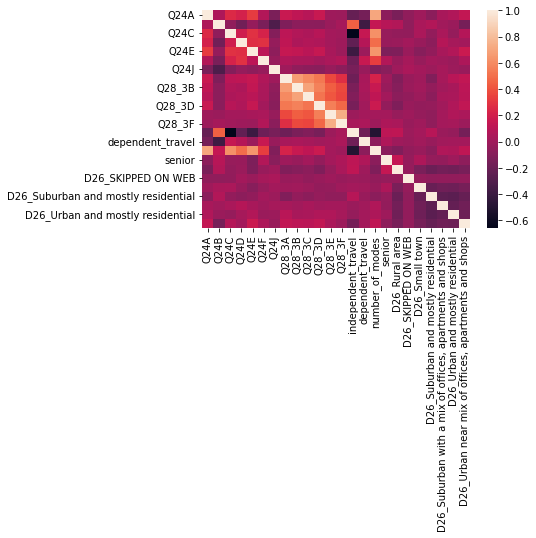

In [15]:
sns.heatmap(x.corr())

In [16]:
log_reg = sm.Logit(y_train,x_train)

In [17]:
log_reg.fit()

         Current function value: 0.000000
         Iterations: 35


C:\Users\Tonyj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Changing Gears to ANOVA table

In [18]:
df_anova_seniors = df_clean[df_clean['senior'] == 1]
df_anova_seniors = df_anova_seniors[['uses_pt','Q28_3A','Q28_3B','Q28_3C','Q28_3D','Q28_3E','Q28_3F']]
df_anova_seniors

,uses_pt,Q28_3A,Q28_3B,Q28_3C,Q28_3D,Q28_3E,Q28_3F
0,0,1.0,1.0,1.0,1.0,5.0,5.0
1,0,5.0,5.0,5.0,4.0,4.0,5.0
6,0,3.0,5.0,4.0,4.0,5.0,5.0
8,0,2.0,2.0,2.0,2.0,1.0,1.0
10,0,4.0,3.0,4.0,3.0,4.0,3.0
...,...,...,...,...,...,...,...
1043,0,4.0,2.0,4.0,4.0,4.0,4.0
1048,1,4.0,5.0,5.0,5.0,4.0,4.0
1052,1,4.0,5.0,5.0,4.0,4.0,4.0
1055,0,4.0,4.0,4.0,3.0,4.0,3.0


In [19]:
df_anova_seniors_vs_rest = df_clean[['senior','Q28_3A','Q28_3B','Q28_3C','Q28_3D','Q28_3E','Q28_3F']]
df_anova_seniors_vs_rest

,senior,Q28_3A,Q28_3B,Q28_3C,Q28_3D,Q28_3E,Q28_3F
0,1,1.0,1.0,1.0,1.0,5.0,5.0
1,1,5.0,5.0,5.0,4.0,4.0,5.0
2,0,2.0,3.0,3.0,3.0,3.0,2.0
3,0,4.0,3.0,4.0,2.0,3.0,2.0
4,0,3.0,3.0,2.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...
1059,0,2.0,2.0,4.0,2.0,3.0,3.0
1060,0,3.0,3.0,3.0,3.0,5.0,5.0
1061,0,1.0,4.0,1.0,1.0,4.0,4.0
1062,0,1.0,1.0,5.0,5.0,5.0,5.0


## Making Graph for P-Values from  Kruskal-Wallis H-test

In [99]:
h_test = [[.91, .55, .41, .33,.22],[1,2,3,4,5]]
test_frame = pd.DataFrame(h_test).transpose()

In [102]:
test_frame.columns = ['Factor','x']
test_frame

,Factor,x
0,0.91,1.0
1,0.55,2.0
2,0.41,3.0
3,0.33,4.0
4,0.22,5.0


(0.0, 0.95)

<Figure size 1440x7200 with 0 Axes>

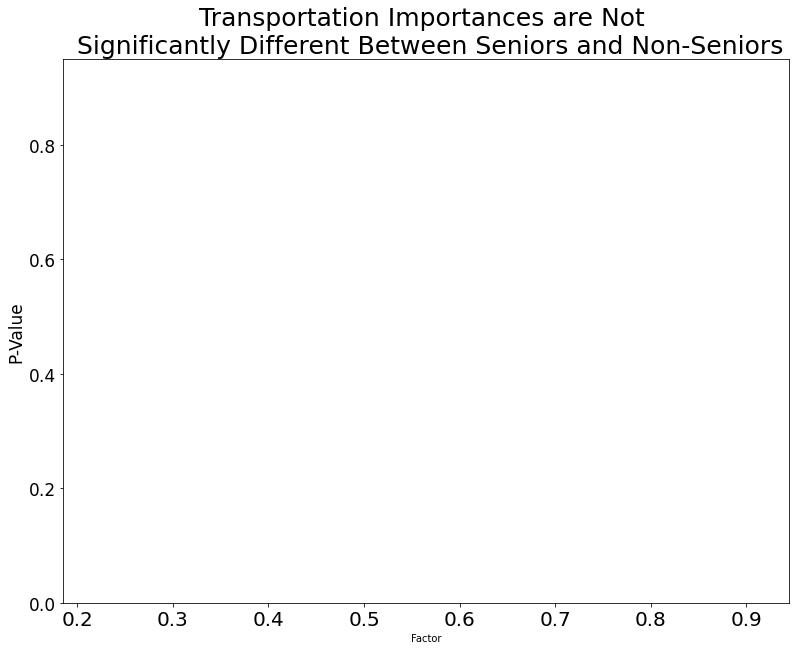

In [113]:
plt.figure(figsize=(20,100))
ax = test_frame.plot.scatter('Factor','x',figsize=(13,10),rot=0,legend=None,color='grey')

plt.title('Transportation Importances are Not \n Significantly Different Between Seniors and Non-Seniors', fontsize=25)
plt.ylabel('P-Value',fontsize=17)
#plt.xlabel('Transportation Factor',fontsize=15)
ax.tick_params(axis='y',labelsize=17)
ax.tick_params(axis='x', labelsize=20,rotation=0)

#bars= ['Accessibility','Affordability','Well-maintained','Timeliness','Safety']
#y_pos = np.arange(len(bars))

#plt.xticks(y_pos,bars, rotation=0, fontsize='15', horizontalalignment='center')
ax.get_yticks()
ax.get_xticks()
plt.ylim(0,.95)


#ax.set_xticklabels(labels)
#ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
#plt.legend(fontsize='xx-large')test_frame.plot.line()

In [20]:
df_anova_use_vs_dont = df_clean[['uses_pt','Q28_3A','Q28_3B','Q28_3C','Q28_3D','Q28_3E','Q28_3F']]
df_anova_use_vs_d

NameError: name 'df_anova_use_vs_d' is not defined

In [ ]:
#https://www.reneshbedre.com/blog/anova.html
# Ordinary Least Squares (OLS) model
#in progress
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table